# Lab 4

## Before Lab
- Read the Scikit-Learn library documentation that covers Bayes nets: https://scikit-learn.org/
stable/modules/naive_bayes.html#
- The algorithm that we cover in the lectures is implemented as ”Multinomial Naive Bayes” in the
Scikit-Learn. At the very least, you should try to run it this week as part of your Portfolio building.
Allowing for some adaptation to your own code, this will amount to running a bit of code like this:

> ```python
> from sklearn.naive_bayes import MultinomialNB
> model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
> model.fit(X, Y)
> ```
- Repeat the evaluation steps from the last lab, replacing the classifier you used with the Bayes net. Check:
does it have better performance in any of the evaluation metrics?
- (optional for BSc, Mandatory for MSc) Study other Bayes net algorithms given in Scikit-Learn:
    * Gaussian Naive Bayes
    * Complement Naive Bayes
    * Bernoulli Naive Bayes
    * Categorical Naive Bayes
Again, use the standard evaluation metrics to see whether any of these algorithms bring improvement to
either overall accuracy or one of the evaluation metrics.
- (hard, optional) There are several implementations of complex Bayes Nets (i.e. Bayes nets with complex
hierarchical structure) available on-line.
Investigate whether any of these libraries can work with your data sets, and whether this brings any
improvement. Note: complex Bayes nets can show non-trivial dependencies among features. So, they may
have better explanatory power. 

## During Lab
- Share your proposed solutions, discuss which Bayes net implementations and which evaluation metrics
worked best. If some worked better, can you hypothesise why?
- Within the Portfolio text, fill in the table
- In the table, highlight with bold the best performing algorithms in each category.
- Make conclusions. You will get more marks for more interesting and “out of the box” questions and
answers.

## After
- Group rep: Make sure all group members have tasks for the week
- Everyone: Incorporate the discussion during the lab into your Python code
- Everyone: Incorporate all code used in the lab into your Portfolio repository.

# Imports 

In [2]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv("Data/processed_data.csv")
df4 = pd.read_csv("Data/data4.csv")

# Statistical Summary and Correlation

In [4]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.260536,0.433908,16.726054,0.272989,0.706897,0.884100,2.603448,2.387931,1.522989,1.970307,...,0.124521,0.039272,0.559387,0.279693,0.062261,0.247126,0.103448,0.237548,0.697318,0.069923
std,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,0.731727,0.834353,...,0.330333,0.194335,0.496699,0.449064,0.241744,0.431548,0.304689,0.425785,0.459639,0.255140
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df4.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03,1.044000e+03
mean,2.722386e-16,1.361193e-16,1.769551e-16,-2.722386e-17,2.586267e-16,-3.437012e-16,8.303277e-16,-1.327163e-16,8.677605e-17,-2.467162e-17,-6.805965e-17,6.805965e-17,-5.742533e-17,-6.465667e-17,-1.361193e-17,-1.361193e-17
std,6.246560e+00,4.288065e+00,1.614253e+00,1.484838e+00,1.403663e+00,1.196816e+00,1.170408e+00,1.122769e+00,8.903509e-01,8.751315e-01,8.031137e-01,7.376059e-01,6.957062e-01,6.446274e-01,6.232674e-01,5.845293e-01
min,-5.742880e+00,-1.196191e+01,-4.394190e+00,-4.290762e+00,-3.500200e+00,-3.541762e+00,-5.081519e+00,-3.450859e+00,-2.902449e+00,-2.507976e+00,-1.932654e+00,-1.704668e+00,-2.186613e+00,-1.635062e+00,-2.548099e+00,-1.740585e+00
25%,-4.114381e+00,-2.873537e+00,-1.160995e+00,-1.009351e+00,-1.111045e+00,-7.682766e-01,-7.094804e-01,-7.868859e-01,-6.131351e-01,-5.635095e-01,-5.588590e-01,-5.242714e-01,-4.478060e-01,-4.831691e-01,-3.975698e-01,-3.719412e-01
50%,-2.013082e+00,-9.866934e-03,-2.689902e-01,-6.539786e-02,-1.229677e-01,-3.968202e-02,-4.825529e-02,-5.092738e-02,4.949189e-02,-1.608525e-02,-6.776500e-02,-1.273003e-01,3.006900e-03,-3.633192e-02,-6.779623e-03,-4.355875e-02
75%,1.719090e+00,2.868079e+00,1.078476e+00,1.009130e+00,9.919618e-01,7.084102e-01,7.288378e-01,7.206685e-01,5.627004e-01,4.677577e-01,5.163589e-01,4.072786e-01,4.665745e-01,4.397003e-01,3.625577e-01,2.922451e-01
max,7.017415e+01,1.363226e+01,4.971109e+00,4.941062e+00,4.277132e+00,4.805824e+00,6.764612e+00,4.711116e+00,2.986917e+00,3.532270e+00,2.908779e+00,2.945373e+00,2.496281e+00,2.111369e+00,3.123185e+00,2.335177e+00


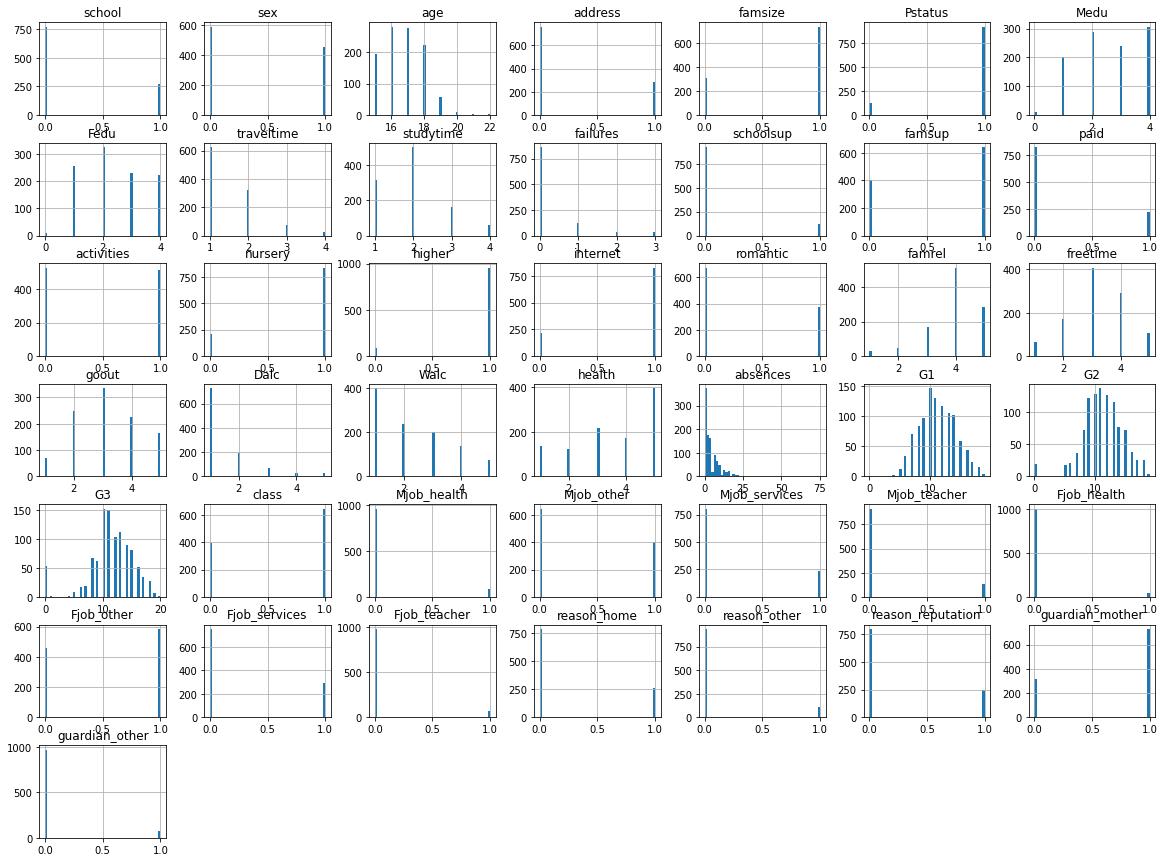

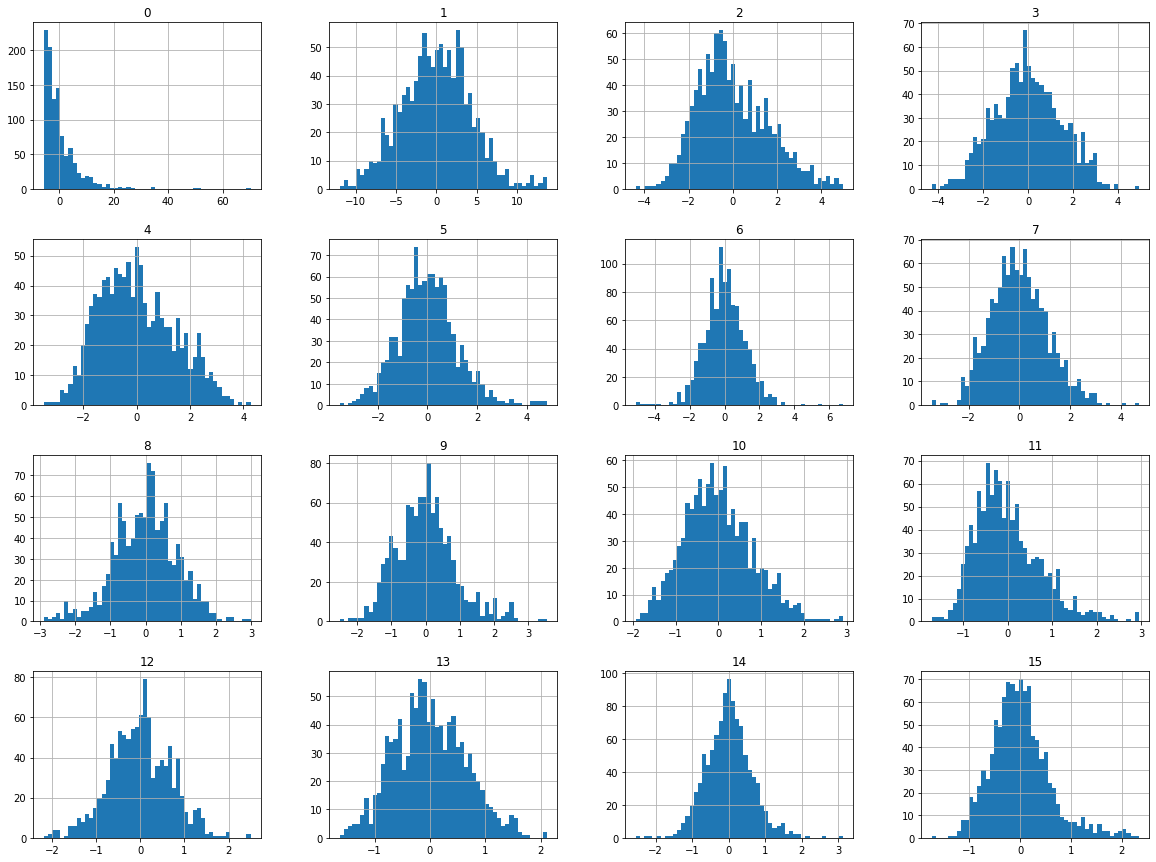

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()
df4.hist(bins=50, figsize=(20,15))
plt.show()

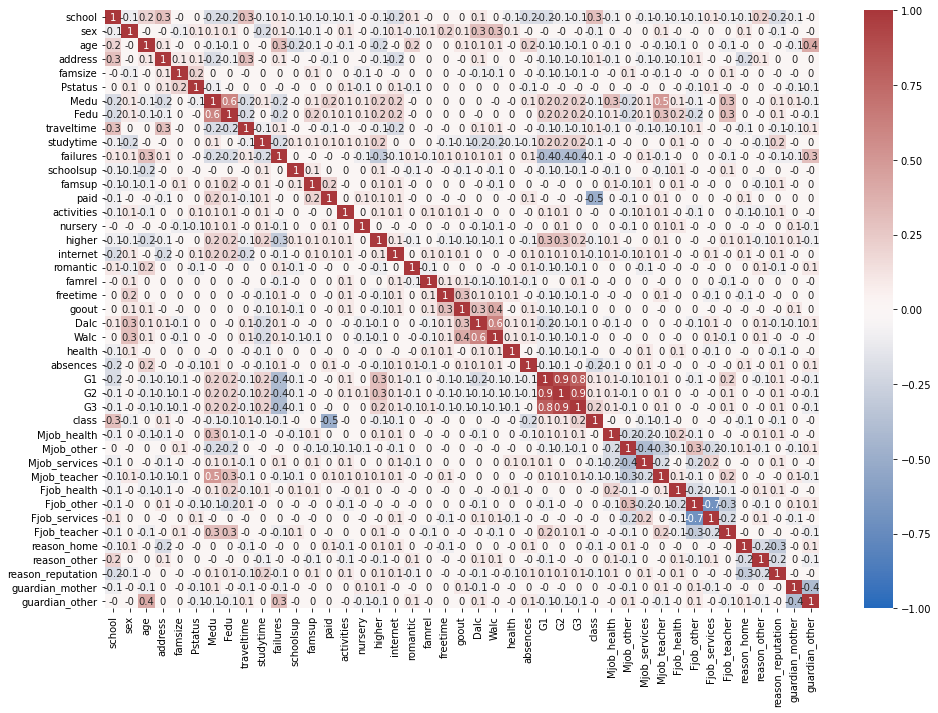

In [7]:
corr_matrix = df.corr().round(1)

# Resizing the heatmap
fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [8]:
print(df.corr()["G3"].sort_values(ascending = False, key=abs))

G3                   1.000000
G2                   0.910743
G1                   0.809142
failures            -0.383145
higher               0.236578
Medu                 0.201472
class                0.187166
studytime            0.161629
Fedu                 0.159796
Dalc                -0.129642
school              -0.127114
age                 -0.125282
reason_reputation    0.121303
address             -0.117696
Walc                -0.115740
internet             0.107064
traveltime          -0.102627
Fjob_teacher         0.101361
Mjob_health          0.101349
romantic            -0.098363
goout               -0.097877
guardian_other      -0.088445
Mjob_teacher         0.084521
health              -0.080079
schoolsup           -0.079346
Mjob_other          -0.066051
freetime            -0.064890
famsize             -0.061209
famrel               0.054461
paid                -0.049388
absences            -0.045671
Mjob_services        0.045015
reason_other        -0.043097
Fjob_healt

# Modelling and Testing

In [10]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, plot_confusion_matrix

from sklearn.naive_bayes import MultinomialNB

features = df["studytime"].to_numpy().reshape(-1,1)
target = df["reason_reputation"].to_numpy().reshape(-1,1)
# target -= np.mean(target)
# tmean = target
# target = target > 0
# target = target.to_numpy().reshape(-1,1)



In [11]:
(x_train, x_test, y_train, y_test) = train_test_split(features, target, test_size=0.25)

model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
model.fit(x_train, y_train)

c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])

Overall accuracy:  0.22988505747126436
recall:  0.0
Fall out or false positive rate 0.0
Precision nan
Recall:  0.0
F-measure:  0.0
True negative rate 1.0
Negative predictive value 0.22988505747126436
False negative rate 1.0
False discovery rate nan


C:\Users\user\AppData\Local\Temp\ipykernel_31380\3777983274.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  PPV = TP/(TP+FP)
C:\Users\user\AppData\Local\Temp\ipykernel_31380\3777983274.py:50: RuntimeWarning: invalid value encountered in longlong_scalars
  FDR = FP/(TP+FP)
c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


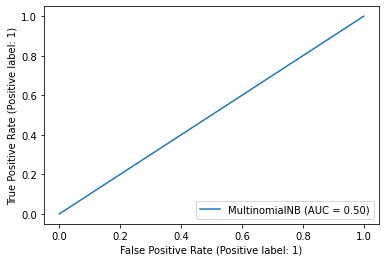

In [12]:

predicted = model.predict(x_test)

#I obtain the confusion matrix
cm = confusion_matrix(y_test, predicted)

FP = cm[1,0] 
FN = cm[0,1]
TP = cm[0,0]
TN = cm[1,1]

# accuracy, TP rate, FP rate, precision, recall, F measure, the ROC

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Overall accuracy: ", ACC)

# TP rate
TPR = TP/(TP+FN)
print("recall: ", TPR)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall out or false positive rate", FPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision", PPV)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Recall: ", TPR)

# F-measure
FM = (2*TPR*PPV)/(TPR+PPV)
print("F-measure: ", TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("True negative rate", TNR)

# Negative predictive value
NPV = TN/(TN+FN)
print("Negative predictive value", NPV)

# False negative rate
FNR = FN/(TP+FN)
print("False negative rate", FNR)

# False discovery rate
FDR = FP/(TP+FP)
print("False discovery rate", FDR)

# ROC curve (true positive / false positive)
plot_roc_curve(model, x_test, y_test)



c:\Users\user\anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


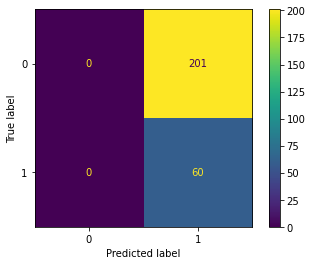

In [13]:
# Plot the confusion matrix
plot_confusion_matrix(model, x_test, y_test)

In [13]:
kf = KFold(10)
model = KNeighborsClassifier(n_neighbors=10)
accuracies = []
for train_index, test_index in kf.split(features,):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]
    model.fit(X_train, y_train.ravel())
    predicted = model.predict(x_test)
    accuracies.append(np.mean(y_test == predicted))

print("Accuracies:", accuracies)
print("Final averaged accuracy:",np.mean(accuracies)*100,"%")


Accuracies: [0.6780879401569057, 0.7277869002006933, 0.5952563400839262, 0.8106185002736727, 0.7211538461538461, 0.7257957559681698, 0.709070144414972, 0.7007073386383731, 0.8461538461538461, 0.8428750368405541]
Final averaged accuracy: 73.57505648884958 %


In [14]:
np.max(accuracies)-np.min(accuracies)

0.2508975060699199